In [1]:
import pandas as pd
from sklearn import linear_model 
import numpy as np

In [2]:
TeamOverview = pd.read_csv(filepath_or_buffer='../TeamOverview.csv', )

In [3]:
TeamOverview.head()

,Season,Team,pointsFor,pointsAgainst,Wins,Losses,Awins,Hwins,Nwins,Hloss,Aloss,Nloss,Seed,SeedNum,BestWin,BestWinSeed,BestWinWin%
0,1985,1102,1514,1653,5,19,3,2,0,8,9,2,NaN,NaN,1140.0,NaN,0.517241
1,1985,1103,1404,1474,9,14,2,7,0,6,8,0,NaN,NaN,1293.0,NaN,0.666667
2,1985,1104,2055,1821,21,9,5,15,1,1,6,2,X07,7.0,1208.0,6.0,0.703704
3,1985,1106,1719,1810,10,14,1,8,1,1,10,3,NaN,NaN,1380.0,16.0,0.642857
4,1985,1108,2075,1876,19,6,8,8,3,1,4,1,NaN,NaN,1380.0,16.0,0.642857


# First Attempt

In [4]:
TurnyResult=pd.read_csv(filepath_or_buffer='../data\\TourneyCompactResults.csv')
TurnyResult.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [5]:
TurnyMatchup = TurnyResult[['Season','Wteam','Lteam']]
ModelData = TeamOverview.merge(TurnyMatchup, left_on=['Season','Team'], right_on=['Season','Wteam'],how='left' )
ModelData = ModelData.merge(TeamOverview, left_on=['Season','Lteam'], right_on=['Season','Team'],how='left' )
ModelData["outcome"]=1
list(ModelData.columns)

['Season',
 'Team_x',
 'pointsFor_x',
 'pointsAgainst_x',
 'Wins_x',
 'Losses_x',
 'Awins_x',
 'Hwins_x',
 'Nwins_x',
 'Hloss_x',
 'Aloss_x',
 'Nloss_x',
 'Seed_x',
 'SeedNum_x',
 'BestWin_x',
 'BestWinSeed_x',
 'BestWinWin%_x',
 'Wteam',
 'Lteam',
 'Team_y',
 'pointsFor_y',
 'pointsAgainst_y',
 'Wins_y',
 'Losses_y',
 'Awins_y',
 'Hwins_y',
 'Nwins_y',
 'Hloss_y',
 'Aloss_y',
 'Nloss_y',
 'Seed_y',
 'SeedNum_y',
 'BestWin_y',
 'BestWinSeed_y',
 'BestWinWin%_y',
 'outcome']

In [6]:
ModelDataL = TeamOverview.merge(TurnyMatchup, left_on=['Season','Team'], right_on=['Season','Lteam'],how='left' )
ModelDataL = ModelData.merge(TeamOverview, left_on=['Season','Wteam'], right_on=['Season','Team'],how='left' )
ModelDataL['outcome']=0
list(ModelData.columns)

['Season',
 'Team_x',
 'pointsFor_x',
 'pointsAgainst_x',
 'Wins_x',
 'Losses_x',
 'Awins_x',
 'Hwins_x',
 'Nwins_x',
 'Hloss_x',
 'Aloss_x',
 'Nloss_x',
 'Seed_x',
 'SeedNum_x',
 'BestWin_x',
 'BestWinSeed_x',
 'BestWinWin%_x',
 'Wteam',
 'Lteam',
 'Team_y',
 'pointsFor_y',
 'pointsAgainst_y',
 'Wins_y',
 'Losses_y',
 'Awins_y',
 'Hwins_y',
 'Nwins_y',
 'Hloss_y',
 'Aloss_y',
 'Nloss_y',
 'Seed_y',
 'SeedNum_y',
 'BestWin_y',
 'BestWinSeed_y',
 'BestWinWin%_y',
 'outcome']

In [7]:
frames = [ModelData,ModelDataL]
ModelData = pd.concat(frames)

In [8]:
ModelData= ModelData.sample(frac=1)
ModelData.head()

,Aloss,Aloss_x,Aloss_y,Awins,Awins_x,Awins_y,BestWin,BestWinSeed,BestWinSeed_x,BestWinSeed_y,...,Wins_x,Wins_y,Wteam,outcome,pointsAgainst,pointsAgainst_x,pointsAgainst_y,pointsFor,pointsFor_x,pointsFor_y
8064,NaN,8,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,10,NaN,NaN,1,NaN,2207,NaN,NaN,2110,NaN
848,NaN,13,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,8,NaN,NaN,0,NaN,2160,NaN,NaN,1968,NaN
10184,NaN,12,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,8,NaN,NaN,1,NaN,2081,NaN,NaN,2000,NaN
5122,NaN,12,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,11,NaN,NaN,0,NaN,1994,NaN,NaN,1942,NaN
1685,NaN,7,NaN,NaN,6,NaN,NaN,NaN,16.0,NaN,...,17,NaN,NaN,1,NaN,2125,NaN,NaN,2213,NaN


In [9]:
len(ModelData)*0.10

2236.8

In [10]:
#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(ModelData)) < 0.9

train = ModelData[msk]

test = ModelData[~msk]

In [11]:
print(len(train))
print(len(test))

20157
2211


In [12]:
train_target = train[['outcome']]
test_target = test[['outcome']]
train_att= train[['pointsFor_x','pointsAgainst_x','Wins_x','Losses_x', 'Awins_x','Hwins_x', 'Nwins_x','Hloss_x', 'Aloss_x',
 'Nloss_x', 'SeedNum_x','BestWinSeed_x','BestWinWin%_x','pointsFor_y','pointsAgainst_y','Wins_y','Losses_y','Awins_y',
 'Hwins_y','Nwins_y','Hloss_y','Aloss_y','Nloss_y','SeedNum_y','BestWinSeed_y','BestWinWin%_y',]]
train_att.fillna(0,inplace=True)
test_att= test[['pointsFor_x','pointsAgainst_x','Wins_x','Losses_x', 'Awins_x','Hwins_x', 'Nwins_x','Hloss_x', 'Aloss_x',
 'Nloss_x', 'SeedNum_x','BestWinSeed_x','BestWinWin%_x','pointsFor_y','pointsAgainst_y','Wins_y','Losses_y','Awins_y',
 'Hwins_y','Nwins_y','Hloss_y','Aloss_y','Nloss_y','SeedNum_y','BestWinSeed_y','BestWinWin%_y',]]
test_att.fillna(0,inplace=True)

C:\Anaconda2\envs\py35\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [13]:
regr = linear_model.LinearRegression()

In [14]:
regr.fit(train_att,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[  4.46816107e-06  -7.96103390e-07   3.00922744e-04   4.69044256e-04
    1.42787061e-03  -7.33873315e-04  -3.93074555e-04  -5.44781181e-05
    7.99550047e-04  -2.76027673e-04   1.68556581e-04  -2.19432968e-05
    1.51248247e-03  -5.72345571e-05   6.44457068e-05  -1.44318326e-04
   -2.34290573e-03  -2.24017398e-03   7.60700730e-04   1.33515492e-03
   -1.30018992e-03  -1.40940996e-03   3.66694155e-04   8.94729475e-05
    5.10452024e-04   4.06111752e-02]]


In [16]:
test_target['pre']=regr.predict(test_att)

C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
test_target.head()

,outcome,pre
6313,0,0.500647
8971,1,0.507424
5008,0,0.501319
7486,1,0.502452
8403,0,0.502783


In [18]:
test_target['pre_win']= test_target['pre'].apply(lambda x: 1 if x<.5 else 0)

C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
(test_target['outcome']==test_target['pre_win']).mean()

0.52917232021709637

# Second Attempt

In [20]:
TurnyResult=pd.read_csv(filepath_or_buffer='../data\\TourneyCompactResults.csv')
#TurnyResult.head()

In [21]:
TurnyResult.reset_index(inplace = True)
#TurnyResult.head()

In [22]:
TurnyResult['index'] = TurnyResult['index'].apply(lambda x: x%2)
#TurnyResult.head()

In [23]:
WisHome = TurnyResult[TurnyResult['index']==0]
LisHome = TurnyResult[TurnyResult['index']==1]
WisHome['outcome'] = 'H'
LisHome['outcome'] = 'A'
WisHome.drop(['index','Daynum','Wscore','Lscore','Wloc','Numot'], inplace=True, axis=1)
LisHome.drop(['index','Daynum','Wscore','Lscore','Wloc','Numot'], inplace=True, axis=1)
WisHome.columns = ['Season','Hteam','Ateam','outcome']
LisHome.columns = ['Season','Ateam','Hteam','outcome']
#print(WisHome.head())
#print(LisHome.head())

C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\envs\

In [24]:
NewTurnyResults = pd.concat([WisHome,LisHome])

In [25]:
NewTurnyResults.head()

,Ateam,Hteam,Season,outcome
0,1234,1116,1985,H
2,1250,1207,1985,H
4,1325,1242,1985,H
6,1338,1256,1985,H
8,1292,1314,1985,H


In [26]:
NewTurnyResults = NewTurnyResults.sample(frac=1,random_state=0)
#NewTurnyResults.head()

In [27]:
#TeamOverview.head()

In [28]:
toJoin = TeamOverview[['Season','Team','pointsFor','pointsAgainst',
                       'Wins','Losses','Awins','Hwins','Nwins','Hloss',
                       'Aloss','Nloss','BestWinWin%','BestWinSeed']]
#toJoin.head()

In [29]:
toJoin['BestWinSeed'].fillna(20, inplace=True)
toJoin.head()

C:\Anaconda2\envs\py35\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Season,Team,pointsFor,pointsAgainst,Wins,Losses,Awins,Hwins,Nwins,Hloss,Aloss,Nloss,BestWinWin%,BestWinSeed
0,1985,1102,1514,1653,5,19,3,2,0,8,9,2,0.517241,20.0
1,1985,1103,1404,1474,9,14,2,7,0,6,8,0,0.666667,20.0
2,1985,1104,2055,1821,21,9,5,15,1,1,6,2,0.703704,6.0
3,1985,1106,1719,1810,10,14,1,8,1,1,10,3,0.642857,16.0
4,1985,1108,2075,1876,19,6,8,8,3,1,4,1,0.642857,16.0


In [30]:
Acol =list(toJoin.columns)
x = 0
x = []
for col in Acol:
    ocol = 'Away-'+col
    x.append(ocol)
AtoJoin = toJoin.copy()
AtoJoin.columns = x
#AtoJoin.head()

In [31]:
#print(list(toJoin.columns))
Hcol =list(toJoin.columns)
y = 0
y = []
for col in Hcol:
    ocol = 'Home-'+col
    y.append(ocol)
HtoJoin = toJoin.copy()
HtoJoin.columns = y
#HtoJoin.head()

In [32]:
NewTurnyResults.columns = ['Away-Team','Home-Team','Season','outcome']
NewTurnyResults = NewTurnyResults.merge(HtoJoin, left_on=['Season','Home-Team'], right_on=['Home-Season','Home-Team'],how='left' )
NewTurnyResults = NewTurnyResults.merge(AtoJoin, left_on=['Season','Away-Team'], right_on=['Away-Season','Away-Team'],how='left' )
NewTurnyResults.drop(['Home-Season','Away-Season'], inplace=True, axis=1)
NewTurnyResults.head()

,Away-Team,Home-Team,Season,outcome,Home-pointsFor,Home-pointsAgainst,Home-Wins,Home-Losses,Home-Awins,Home-Hwins,...,Away-Wins,Away-Losses,Away-Awins,Away-Hwins,Away-Nwins,Away-Hloss,Away-Aloss,Away-Nloss,Away-BestWinWin%,Away-BestWinSeed
0,1462,1309,1993,A,2051,1701,25,3,9,14,...,22,5,7,11,4,0,4,1,0.785714,14.0
1,1417,1281,1995,A,2094,1993,19,8,6,11,...,25,2,11,13,1,1,1,0,0.862069,1.0
2,1116,1258,1989,A,3221,3068,19,10,6,9,...,24,6,5,13,6,1,5,0,0.750000,11.0
3,1229,1425,1985,A,1915,1809,19,9,8,9,...,20,7,6,11,3,3,4,0,0.758621,6.0
4,1276,1257,2013,H,2501,1971,29,5,8,15,...,25,7,5,16,4,1,5,1,0.787879,2.0


In [33]:
from sklearn import tree

In [34]:
np.random.seed(0)
msk = np.random.rand(len(NewTurnyResults)) < 0.9

train = NewTurnyResults[msk]

test = NewTurnyResults[~msk]

train_target = train[['outcome']]
test_target = test[['outcome']]

train_att = train.drop(['Away-Team','Home-Team','Season','outcome'], axis=1)
test_att = test.drop(['Away-Team','Home-Team','Season','outcome'], axis=1)

In [35]:
clf = tree.DecisionTreeClassifier(max_depth=5,random_state=0)
clf = clf.fit(train_att,train_target)

In [36]:
test_target['pred'] =clf.predict(test_att)


C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
test_target.head()

,outcome,pred
8,A,A
13,H,H
20,A,H
27,H,A
38,H,A


In [38]:
(test_target['pred']==test_target['outcome']).mean()

0.63793103448275867

In [39]:
from IPython.display import Image
import pydotplus

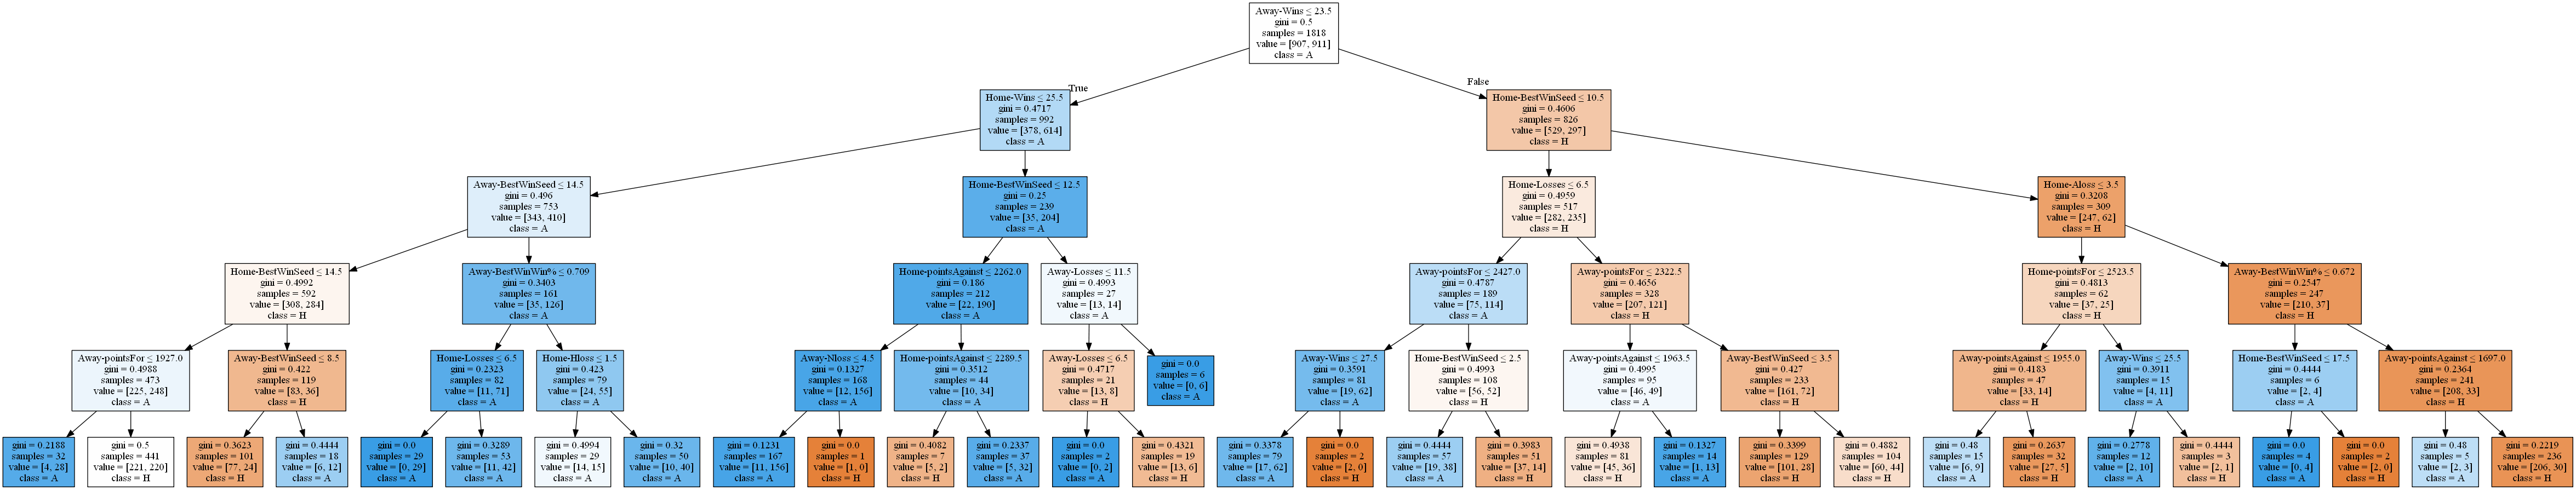

In [40]:
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,
                                special_characters=True, feature_names=list(train_att.columns), class_names=['H','A'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [41]:
graph.write_pdf('../visuals\\ncaa.pdf')

True

In [42]:
from sklearn.datasets import load_iris

In [43]:
iris = load_iris()
iris.target_names


array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [44]:
from sklearn import ensemble
clfforest = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=6,random_state=0, min_impurity_split=.15)

In [45]:
clfforest = clfforest.fit(train_att,train_target['outcome'].ravel())

In [46]:
test_target['ForestPred'] =clfforest.predict(test_att)

C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
test_target.head()

,outcome,pred,ForestPred
8,A,A,A
13,H,H,A
20,A,H,H
27,H,A,H
38,H,A,H


In [48]:
print((test_target['pred']==test_target['outcome']).mean())
print((test_target['ForestPred']==test_target['outcome']).mean())

0.637931034483
0.724137931034


In [49]:
'''for x in range(3,15):
    for y in range(1,4):
        clfforest = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=x,random_state=0,min_impurity_split=float(y*5/100))
        clfforest = clfforest.fit(train_att,train_target['outcome'].ravel())
        ForestPred =clfforest.predict(test_att)
        print(x,'-',float(y*5/100),'-',(ForestPred==test_target['outcome']).mean())'''

"for x in range(3,15):\n    for y in range(1,4):\n        clfforest = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=x,random_state=0,min_impurity_split=float(y*5/100))\n        clfforest = clfforest.fit(train_att,train_target['outcome'].ravel())\n        ForestPred =clfforest.predict(test_att)\n        print(x,'-',float(y*5/100),'-',(ForestPred==test_target['outcome']).mean())"

In [50]:
'''depth=[6,10]
for x in depth:
    for y in range(0,11):
        clfforest = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=x,random_state=0,min_impurity_split=float((y+10)/100))
        clfforest = clfforest.fit(train_att,train_target['outcome'].ravel())
        ForestPred =clfforest.predict(test_att)
        print(x,'-',float((y+10)/100),'-',(ForestPred==test_target['outcome']).mean())'''

"depth=[6,10]\nfor x in depth:\n    for y in range(0,11):\n        clfforest = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=x,random_state=0,min_impurity_split=float((y+10)/100))\n        clfforest = clfforest.fit(train_att,train_target['outcome'].ravel())\n        ForestPred =clfforest.predict(test_att)\n        print(x,'-',float((y+10)/100),'-',(ForestPred==test_target['outcome']).mean())"

## Create First Submision Data Set Score=.488594

In [51]:
sampleSub = pd.read_csv('../data\\sample_submission.csv', verbose=False)
sampleSub.head()

,id,pred
0,2013_1103_1107,0.5
1,2013_1103_1112,0.5
2,2013_1103_1125,0.5
3,2013_1103_1129,0.5
4,2013_1103_1137,0.5


In [52]:
idsplit = sampleSub['id'].str.split('_',expand=True)
idsplit.columns = ['Season','predteam','oteam']
Subtest= sampleSub.join(idsplit)
Subtest.head()

,id,pred,Season,predteam,oteam
0,2013_1103_1107,0.5,2013,1103,1107
1,2013_1103_1112,0.5,2013,1103,1112
2,2013_1103_1125,0.5,2013,1103,1125
3,2013_1103_1129,0.5,2013,1103,1129
4,2013_1103_1137,0.5,2013,1103,1137


In [53]:
Subtest['Season'] = pd.to_numeric(Subtest['Season'])
Subtest['predteam'] = pd.to_numeric(Subtest['predteam'])
Subtest['oteam'] = pd.to_numeric(Subtest['oteam'])

In [54]:
AtoJoin.head()
HtoJoin.head()

,Home-Season,Home-Team,Home-pointsFor,Home-pointsAgainst,Home-Wins,Home-Losses,Home-Awins,Home-Hwins,Home-Nwins,Home-Hloss,Home-Aloss,Home-Nloss,Home-BestWinWin%,Home-BestWinSeed
0,1985,1102,1514,1653,5,19,3,2,0,8,9,2,0.517241,20.0
1,1985,1103,1404,1474,9,14,2,7,0,6,8,0,0.666667,20.0
2,1985,1104,2055,1821,21,9,5,15,1,1,6,2,0.703704,6.0
3,1985,1106,1719,1810,10,14,1,8,1,1,10,3,0.642857,16.0
4,1985,1108,2075,1876,19,6,8,8,3,1,4,1,0.642857,16.0


In [55]:

Subtest = Subtest.merge(HtoJoin, left_on=['Season','oteam'], right_on=['Home-Season','Home-Team'],how='left' )
Subtest = Subtest.merge(AtoJoin, left_on=['Season','predteam'], right_on=['Away-Season','Away-Team'],how='left' )
Subtest.drop(['Home-Season','Away-Season'], inplace=True, axis=1)
Subtest.head()

,id,pred,Season,predteam,oteam,Home-Team,Home-pointsFor,Home-pointsAgainst,Home-Wins,Home-Losses,...,Away-Wins,Away-Losses,Away-Awins,Away-Hwins,Away-Nwins,Away-Hloss,Away-Aloss,Away-Nloss,Away-BestWinWin%,Away-BestWinSeed
0,2013_1103_1107,0.5,2013,1103,1107,1107,2190,2050,24,10,...,25,6,7,14,4,1,4,1,0.848485,11.0
1,2013_1103_1112,0.5,2013,1103,1112,1112,2345,2038,25,7,...,25,6,7,14,4,1,4,1,0.848485,11.0
2,2013_1103_1125,0.5,2013,1103,1125,1125,2307,1939,24,6,...,25,6,7,14,4,1,4,1,0.848485,11.0
3,2013_1103_1129,0.5,2013,1103,1129,1129,2061,1927,19,10,...,25,6,7,14,4,1,4,1,0.848485,11.0
4,2013_1103_1137,0.5,2013,1103,1137,1137,2152,1846,27,5,...,25,6,7,14,4,1,4,1,0.848485,11.0


In [56]:
atts = list(train_att.columns)
atts

['Home-pointsFor',
 'Home-pointsAgainst',
 'Home-Wins',
 'Home-Losses',
 'Home-Awins',
 'Home-Hwins',
 'Home-Nwins',
 'Home-Hloss',
 'Home-Aloss',
 'Home-Nloss',
 'Home-BestWinWin%',
 'Home-BestWinSeed',
 'Away-pointsFor',
 'Away-pointsAgainst',
 'Away-Wins',
 'Away-Losses',
 'Away-Awins',
 'Away-Hwins',
 'Away-Nwins',
 'Away-Hloss',
 'Away-Aloss',
 'Away-Nloss',
 'Away-BestWinWin%',
 'Away-BestWinSeed']

In [57]:
Subtest['pred'] =clfforest.predict_proba(Subtest[atts])
Subtest.head()

,id,pred,Season,predteam,oteam,Home-Team,Home-pointsFor,Home-pointsAgainst,Home-Wins,Home-Losses,...,Away-Wins,Away-Losses,Away-Awins,Away-Hwins,Away-Nwins,Away-Hloss,Away-Aloss,Away-Nloss,Away-BestWinWin%,Away-BestWinSeed
0,2013_1103_1107,0.610446,2013,1103,1107,1107,2190,2050,24,10,...,25,6,7,14,4,1,4,1,0.848485,11.0
1,2013_1103_1112,0.459571,2013,1103,1112,1112,2345,2038,25,7,...,25,6,7,14,4,1,4,1,0.848485,11.0
2,2013_1103_1125,0.500631,2013,1103,1125,1125,2307,1939,24,6,...,25,6,7,14,4,1,4,1,0.848485,11.0
3,2013_1103_1129,0.613157,2013,1103,1129,1129,2061,1927,19,10,...,25,6,7,14,4,1,4,1,0.848485,11.0
4,2013_1103_1137,0.562907,2013,1103,1137,1137,2152,1846,27,5,...,25,6,7,14,4,1,4,1,0.848485,11.0


In [58]:
Sub = Subtest[['id','pred']]
Sub.to_csv('../submissions\\firstsub.csv',index=False)

# Same model parameters but use total dataset to train Score = .5408804

In [59]:
from sklearn import ensemble
clfforest2 = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=6,random_state=0, min_impurity_split=.15)
clfforest2 = clfforest2.fit(NewTurnyResults[atts],NewTurnyResults['outcome'].ravel())

In [60]:
Subtest2 =Subtest.copy()
Subtest2['pred'] =clfforest2.predict_proba(Subtest2[atts])
Subtest2.head()

,id,pred,Season,predteam,oteam,Home-Team,Home-pointsFor,Home-pointsAgainst,Home-Wins,Home-Losses,...,Away-Wins,Away-Losses,Away-Awins,Away-Hwins,Away-Nwins,Away-Hloss,Away-Aloss,Away-Nloss,Away-BestWinWin%,Away-BestWinSeed
0,2013_1103_1107,0.617396,2013,1103,1107,1107,2190,2050,24,10,...,25,6,7,14,4,1,4,1,0.848485,11.0
1,2013_1103_1112,0.454896,2013,1103,1112,1112,2345,2038,25,7,...,25,6,7,14,4,1,4,1,0.848485,11.0
2,2013_1103_1125,0.522519,2013,1103,1125,1125,2307,1939,24,6,...,25,6,7,14,4,1,4,1,0.848485,11.0
3,2013_1103_1129,0.611185,2013,1103,1129,1129,2061,1927,19,10,...,25,6,7,14,4,1,4,1,0.848485,11.0
4,2013_1103_1137,0.573425,2013,1103,1137,1137,2152,1846,27,5,...,25,6,7,14,4,1,4,1,0.848485,11.0


In [61]:
Sub = Subtest2[['id','pred']]
Sub.to_csv('../submissions\\secondsub.csv',index=False)

In [62]:
msk = np.random.rand(len(NewTurnyResults)) < 0.9
msk

array([False,  True, False, ...,  True,  True,  True], dtype=bool)